In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [20]:
from skimage.transform import resize

In [9]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


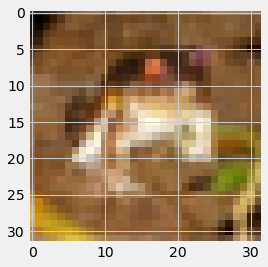

In [11]:
plt.imshow(x_train[0])

In [12]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(classes[y_train[0][0]])

frog


In [13]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [14]:
# Normalization of Pixel Values
x_train = x_train/255
x_test = x_test/255

In [15]:
from keras.backend import dropout
# create the model architecture

model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
hist = model.fit(x_train, y_train_one_hot
                 ,batch_size=256,
                 epochs=10,
                 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 63s 391ms/step - loss: 1.8072 - accuracy: 0.3158 - val_loss: 1.4846 - val_accuracy: 0.4598
Epoch 2/10
157/157 [==============================] - 64s 405ms/step - loss: 1.4283 - accuracy: 0.4794 - val_loss: 1.2953 - val_accuracy: 0.5383
Epoch 3/10
157/157 [==============================] - 58s 371ms/step - loss: 1.2585 - accuracy: 0.5441 - val_loss: 1.1524 - val_accuracy: 0.5907
Epoch 4/10
157/157 [==============================] - 59s 374ms/step - loss: 1.1646 - accuracy: 0.5871 - val_loss: 1.0997 - val_accuracy: 0.6132
Epoch 5/10
157/157 [==============================] - 59s 376ms/step - loss: 1.0713 - accuracy: 0.6202 - val_loss: 1.0287 - val_accuracy: 0.6374
Epoch 6/10
157/157 [==============================] - 60s 382ms/step - loss: 1.0101 - accuracy: 0.6425 - val_loss: 1.0484 - val_accuracy: 0.6344
Epoch 7/10
157/157 [==============================] - 59s 373ms/step - loss: 0.9385 - accuracy: 0.6702 - val_loss: 1.0882 - val_ac

In [33]:
from google.colab import files
uploaded = files.upload()

Saving dog.jpg to dog.jpg


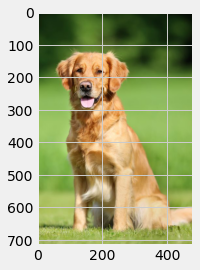

In [35]:
img = plt.imread('dog.jpg')
image = plt.imshow(img)

In [36]:
rs_img = resize(img, (32,32,3))

In [37]:
predictions = model.predict(np.array([rs_img]))
predictions

array([[1.4597001e-04, 2.9873638e-05, 9.0778038e-02, 5.1029533e-02,
        2.9338259e-01, 5.0188065e-01, 5.8406860e-02, 4.2376844e-03,
        4.4167766e-05, 6.4649386e-05]], dtype=float32)

In [38]:
# Sort the labels according to the greatest confidence value
arr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in range(10):
  for j in range(10):
    if predictions[0][arr[i]]>predictions[0][arr[j]]:
      temp = arr[i]
      arr[i] = arr[j]
      arr[j] = temp

# Print the Sorted Array
print(arr)

[5, 4, 2, 6, 3, 7, 0, 9, 8, 1]


In [40]:
# Predict Value with the greatest confidence

print('The given image is of a' ,classes[arr[0]])

The given image is of a dog
